In [1]:
import numpy as np
import pandas as pd

In [2]:
datapath = './homework_data/accidents_2017.csv'   #데이터 불러오기

original_data = pd.read_csv(datapath)
original_data.shape


(10339, 15)

In [3]:
original_data.info()
#NULL값은 존재하지 않는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [4]:
#original_data.head(10)  #데이터 확인

Id District Name           Neighborhood Name  \
0  2017S008429           Unknown                     Unknown   
1  2017S007316           Unknown                     Unknown   
2  2017S010210           Unknown                     Unknown   
3  2017S006364           Unknown                     Unknown   
4  2017S004615        Sant Martí  el Camp de l'Arpa del Clot   
5  2017S007775        Sant Martí  el Camp de l'Arpa del Clot   
6  2017S004484        Sant Martí  el Camp de l'Arpa del Clot   
7  2017S010680        Sant Martí  el Camp de l'Arpa del Clot   
8  2017S005152        Sant Martí  el Camp de l'Arpa del Clot   
9  2017S003932        Sant Martí  el Camp de l'Arpa del Clot   

                                              Street    Weekday      Month  \
0  Número 27                                     ...     Friday    October   
1  Número 3 Zona Franca / Número 50 Zona Franca  ...     Friday  September   
2  Litoral (Besòs)                               ...     Friday   December   
3  Número 3 Zona Franca                          ...     Friday       July   
4  Las Navas de Tolosa                           ...   Thursday        May   
5  Indústria / Trinxant                          ...  Wednesday  September   
6  Trinxant / Indústria                          ...   Saturday        May   
7  Indústria                                     ...    Tuesday   December   
8  Indústria                                     ...     Monday       June   
9  Maragall                                      ...  Wednesday        May   

   Day  Hour Part of the day  Mild injuries  Serious injuries  Victims  \
0   13     8         Morning              2                 0        2   
1    1    13         Morning              2                 0        2   
2    8    21       Afternoon              5                 0        5   
3   21     2           Night              1                 0        1   
4   25    14       Afternoon              1                 0        1   
5   20    12         Morning              1                 0        1   
6   20    21       Afternoon              1                 0        1   
7   26    20       Afternoon              2                 0        2   
8   12    15       Afternoon              1                 0        1   
9    3    20       Afternoon              1                 0        1   

   Vehicles involved  Longitude   Latitude  
0                  2   2.125624  41.340045  
1                  2   2.120452  41.339426  
2                  2   2.167356  41.360885  
3                  2   2.124529  41.337668  
4                  3   2.185272  41.416365  
5                  2   2.183245  41.416336  
6                  2   2.183245  41.416336  
7                  1   2.183561  41.416372  
8                  1   2.184059  41.416763  
9                  1   2.181225  41.413958

In [5]:
from sklearn import preprocessing

#범주형 변수처리
le_district_name = preprocessing.LabelEncoder()
filtered_data1 = original_data.copy()
filtered_data1['District Name'] = le_district_name.fit_transform(original_data['District Name'])   #nuknown 10

le_neughbirhood_name = preprocessing.LabelEncoder()
filtered_data2 = filtered_data1.copy()
filtered_data2['Neighborhood Name'] = le_neughbirhood_name.fit_transform(filtered_data1['Neighborhood Name'])  #unknown 24

le_street = preprocessing.LabelEncoder()
filtered_data3 = filtered_data2.copy()
filtered_data3['Street'] = le_street.fit_transform(filtered_data2['Street'])

le_month = preprocessing.LabelEncoder()
filtered_data4 = filtered_data3.copy()
filtered_data4['Month'] = le_month.fit_transform(filtered_data3['Month'])

#filtered_data1.head()
le_weekday = preprocessing.LabelEncoder()
filtered_data5 = filtered_data4.copy()
filtered_data5['Weekday'] = le_weekday.fit_transform(filtered_data4['Weekday'])

le_part_of_the_day = preprocessing.LabelEncoder()
final_data = filtered_data5.copy()
final_data['Part of the day'] = le_part_of_the_day.fit_transform(filtered_data5['Part of the day'])
#final_data.head(30) #데이터 확인

Id  District Name  Neighborhood Name  Street  Weekday  Month  \
0   2017S008429                 10                 24    2661        0     10   
1   2017S007316                 10                 24    2666        0     11   
2   2017S010210                 10                 24    2157        0      2   
3   2017S006364                 10                 24    2663        0      5   
4   2017S004615                  7                 35    2117        4      8   
5   2017S007775                  7                 35    1940        6     11   
6   2017S004484                  7                 35    3948        2      8   
7   2017S010680                  7                 35    1924        5      2   
8   2017S005152                  7                 35    1924        1      6   
9   2017S003932                  7                 35    2383        6      8   
10  2017S010348                  7                 35    1924        4      2   
11  2017S000245                  7                 35    3565        6      4   
12  2017S005695                  7                 35    3604        0      6   
13  2017S007384                  7                 35    3599        1     11   
14  2017S008080                  7                 35    3599        2     11   
15  2017S003439                  7                 35    1174        1      0   
16  2017S002410                  7                 35    1159        2      7   
17  2017S009296                  7                 35    1924        4      9   
18  2017S010102                  7                 35    3473        1      2   
19  2017S002158                  7                 35    3980        0      7   
20  2017S007606                  7                 35    4101        4     11   
21  2017S007805                  7                 35    4119        6     11   
22  2017S008987                  7                 35    4101        1     10   
23  2017S002244                  7                 35      48        1      7   
24  2017S001012                  7                 35    2232        5      3   
25  2017S009722                  7                 35    2332        6      9   
26  2017S001895                  7                 35    1217        6      7   
27  2017S008277                  7                 35    2346        2     10   
28  2017S004380                  7                 35    4119        6      8   
29  2017S001233                  7                 35    3980        5      3   

    Day  Hour  Part of the day  Mild injuries  Serious injuries  Victims  \
0    13     8                1              2                 0        2   
1     1    13                1              2                 0        2   
2     8    21                0              5                 0        5   
3    21     2                2              1                 0        1   
4    25    14                0              1                 0        1   
5    20    12                1              1                 0        1   
6    20    21                0              1                 0        1   
7    26    20                0              2                 0        2   
8    12    15                0              1                 0        1   
9     3    20                0              1                 0        1   
10   14    20                0              1                 0        1   
11   11     7                1              1                 0        1   
12   30    12                1              1                 0        1   
13    4    16                0              0                 1        1   
14   30    19                0              1                 0        1   
15   17    14                0              1                 0        1   
16   25    14                0              4                 0        4   
17    9    22                2              1                 0        1   
18    4     0                2              2                

In [6]:
# 명목변수인 id는 제거 : 단순히 개인을 구분을 위한 변수이므로 모델에 필요하지 않다고 판단
del(final_data['Id'])
#final_data.head(10)  #데이터 확인


District Name  Neighborhood Name  Street  Weekday  Month  Day  Hour  \
0              10                 24    2661        0     10   13     8   
1              10                 24    2666        0     11    1    13   
2              10                 24    2157        0      2    8    21   
3              10                 24    2663        0      5   21     2   
4               7                 35    2117        4      8   25    14   
5               7                 35    1940        6     11   20    12   
6               7                 35    3948        2      8   20    21   
7               7                 35    1924        5      2   26    20   
8               7                 35    1924        1      6   12    15   
9               7                 35    2383        6      8    3    20   
10              7                 35    1924        4      2   14    20   
11              7                 35    3565        6      4   11     7   
12              7                 35    3604        0      6   30    12   
13              7                 35    3599        1     11    4    16   
14              7                 35    3599        2     11   30    19   
15              7                 35    1174        1      0   17    14   
16              7                 35    1159        2      7   25    14   
17              7                 35    1924        4      9    9    22   
18              7                 35    3473        1      2    4     0   
19              7                 35    3980        0      7   17    16   
20              7                 35    4101        4     11   14    14   
21              7                 35    4119        6     11   20    20   
22              7                 35    4101        1     10   30    20   
23              7                 35      48        1      7   20    19   
24              7                 35    2232        5      3    7    11   
25              7                 35    2332        6      9   22    20   
26              7                 35    1217        6      7    8    12   
27              7                 35    2346        2     10    7     6   
28              7                 35    4119        6      8   17    13   
29              7                 35    3980        5      3   14    16   

    Part of the day  Mild injuries  Serious injuries  Victims  \
0                 1              2                 0        2   
1                 1              2                 0        2   
2                 0              5                 0        5   
3                 2              1                 0        1   
4                 0              1                 0        1   
5                 1              1                 0        1   
6                 0              1                 0        1   
7                 0              2                 0        2   
8                 0              1                 0        1   
9                 0              1                 0        1   
10                0              1                 0        1   
11                1              1                 0        1   
12                1              1                 0        1   
13                0              0                 1        1   
14                0              1                 0        1   
15                0              1                 0        1   
16                0              4                 0        4   
17                2              1                 0        1   
18                2              2                 0        2   
19                0              1                 0        1   
20                0              1                 0        1   
21                0              0                 1        1   
22                0              1                 0        1   
23                0              1                 0        1   
24                1              1                 0 

In [7]:
#모든 Feature를 사용하면 모델의 정확도는 높게 나타나겠지만
#모든 Feature를 사용한다고 해서 다 좋은 것만은 아니다. 
#필요한 Feature를 select해서 사용하는것이 좋음

In [8]:
##Feature selection
#1)변수간의 상관성 알아보기
#1-1) 선형 회귀의 가정 중 서로 상관관계를 가지는 변수를 함께 사용하지 않는 것이 좋음
# 상관관계가 높은 변수는 둘 중 하나만 유지하고 나머지는 삭제하거나 두 개 모두 삭제

final_data.corr() 
#Part of the day , Hour -0.542881  
#높은 상관관계는 아니지만 0.5이상이므로 상관관계가 어느정도 있다고 판단하고 두 변수 중 하나를 제거한다. 
#Part of the day가 결국 Hour에 의해 결정되는 값라고 볼 수 있어 상관성이 높은듯 보인다. (두 변수를 모두 사용할 필요가 없다.)
#-> 이후 다른 분석 결과를 통해 제거


District Name  Neighborhood Name    Street   Weekday  \
District Name           1.000000          -0.277081  0.004299 -0.009610   
Neighborhood Name      -0.277081           1.000000 -0.039576  0.023707   
Street                  0.004299          -0.039576  1.000000  0.012227   
Weekday                -0.009610           0.023707  0.012227  1.000000   
Month                   0.028788          -0.003344  0.011398 -0.017878   
Day                    -0.015525          -0.009374  0.002968 -0.012551   
Hour                   -0.014306           0.009491  0.008301  0.006172   
Part of the day        -0.010980          -0.001168 -0.006390 -0.012841   
Mild injuries           0.028654          -0.018771 -0.013012 -0.000058   
Serious injuries        0.015274          -0.023137 -0.002424 -0.010559   
Victims                 0.032422          -0.023919 -0.013451 -0.002887   
Vehicles involved       0.028947           0.015229 -0.038211  0.005924   
Longitude              -0.129754          -0.040395  0.060601 -0.012821   
Latitude                0.048655          -0.203939  0.027258 -0.001562   

                      Month       Day      Hour  Part of the day  \
District Name      0.028788 -0.015525 -0.014306        -0.010980   
Neighborhood Name -0.003344 -0.009374  0.009491        -0.001168   
Street             0.011398  0.002968  0.008301        -0.006390   
Weekday           -0.017878 -0.012551  0.006172        -0.012841   
Month              1.000000  0.047424 -0.001172        -0.006008   
Day                0.047424  1.000000  0.012877        -0.015424   
Hour              -0.001172  0.012877  1.000000        -0.542881   
Part of the day   -0.006008 -0.015424 -0.542881         1.000000   
Mild injuries      0.015058  0.006975  0.042420        -0.026746   
Serious injuries   0.016894 -0.001686 -0.007614         0.011017   
Victims            0.018912  0.006407  0.040177        -0.023680   
Vehicles involved -0.019860 -0.010914 -0.022223         0.000487   
Longitude         -0.024887 -0.017236 -0.006215         0.022711   
Latitude          -0.025218 -0.006184  0.018699        -0.017535   

                   Mild injuries  Serious injuries   Victims  \
District Name           0.028654          0.015274  0.032422   
Neighborhood Name      -0.018771         -0.023137 -0.023919   
Street                 -0.013012         -0.002424 -0.013451   
Weekday                -0.000058         -0.010559 -0.002887   
Month                   0.015058          0.016894  0.018912   
Day                     0.006975         -0.001686  0.006407   
Hour                    0.042420         -0.007614  0.040177   
Part of the day        -0.026746          0.011017 -0.023680   
Mild injuries           1.000000         -0.150482  0.974272   
Serious injuries       -0.150482          1.000000  0.071450   
Victims                 0.974272          0.071450  1.000000   
Vehicles involved       0.160052         -0.015678  0.157185   
Longitude               0.008475          0.005372  0.009355   
Latitude                0.014091          0.000299  0.013520   

                   Vehicles involved  Longitude  Latitude  
District Name               0.028947  -0.129754  0.048655  
Neighborhood Name           0.015229  -0.040395 -0.203939  
Street                     -0.038211   0.060601  0.027258  
Weekday                     0.005924  -0.012821 -0.001562  
Month                      -0.019860  -0.024887 -0.025218  
Day                        -0.010914  -0.017236 -0.006184  
Hour                       -0.022223  -0.006215  0.018699  
Part of the day             0.000487   0.022711 -0.017535  
Mild injuries               0.160052   0.008475  0.014091  
Serious injuries           -0.015678   0.005372  0.000299  
Victims                     0.157185   0.009355  0.013520  
Vehicles involved           1.000000  -0.006864  0.002440  
Longitude                  -0.006864   1.000000  0.396106  
Latitude                    0.002440   0.396106  1.000000

In [9]:
##Feature selection
#1)변수간의 상관성 알아보기
#1-2)예측하고자 하는 변수(target)와 상관관계가 높은 feature값을 찾는다.
#예측변수와 상관성이 높은 변수는 feature에 포함한

cor = final_data.corr()
cor_target = abs (cor["Victims"])
 
relevant_features = cor_target [cor_target> 0.5] 
relevant_features

#0.5이상의 상관계수를 보이는 변수를 추출
#Mild injuries 0.974272
#예측변수인 Victims와 높은 상관성을 보이는 변수는 Mild injuries였고, 모델에 적용시킬 feature에 포함시킨다. 

Mild injuries    0.974272
Victims          1.000000
Name: Victims, dtype: float64

In [10]:
##Feature selection
#2) 주성분 분석(PCA) :: 최적의 Feature값을 찾는다.
#분산 비율이 작은 변수를 제거 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = ['District Name','Neighborhood Name','Street','Weekday','Month','Day','Hour','Part of the day','Mild injuries','Serious injuries','Vehicles involved','Longitude','Latitude']
x = final_data.loc[:, features].values
y = final_data.loc[:, ['Victims']].values

x = StandardScaler().fit_transform(x)  #정규화

pca = PCA()
fit = pca.fit(x)

pca_fit = pca.fit_transform(x)
pca_df = pd.DataFrame(data = pca_fit)
print("Explained Variance: %s" % fit.explained_variance_ratio_) #투영한 결과의 분산 비율
pca_df.head()

# 분산 비율을 확인해본 결과 각 변수들 중에 높은 비율을 나타내는 값이 없다. (가장 높은 비율이 11% 정도 이므로 이 결과는 선택 기준에 포함하지 않도록 한다.)

Explained Variance: [0.11933591 0.11430061 0.09945569 0.09442443 0.08121442 0.07842056
 0.07563667 0.07405786 0.07267927 0.06022171 0.05228509 0.04294758
 0.03502022]


0         1         2         3         4         5         6   \
0  1.201770 -1.842231  3.173889 -0.157951 -1.019274 -0.133182 -1.314694   
1  0.595069 -1.993265  3.236655 -0.104598 -0.284987 -0.204303 -1.702518   
2 -1.993273 -0.188898  2.618270 -3.004893  0.387873  0.204477 -1.910973   
3  3.144902 -1.831332  2.853262  0.460054 -0.572659 -0.147249 -1.335729   
4 -0.784731  1.188198  0.502982 -0.546853 -0.727996  0.293517  1.333642   

         7         8         9         10        11        12  
0  1.249885 -0.035715  0.589783  0.016633  1.184273 -0.380573  
1  2.086155 -0.822615  0.596524  0.175389  1.065542  0.285910  
2  0.764562  0.655225  3.606470 -0.627541  1.696039  0.110777  
3 -0.010345  1.253133 -0.113285 -0.045898  1.250409 -0.106687  
4  0.153901  0.387386 -1.238910 -0.500545  0.336301 -0.525166

In [11]:
##Feature selection
#3) Feature의 중요도
#랜덤 포레스트 및 엑스트라 트리와 같은 지연된 의사 결정 트리를 사용하여 기능의 중요성을 평가할 수 있습니다.
#Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

features = ['District Name','Neighborhood Name','Street','Weekday','Month','Day','Hour','Part of the day','Mild injuries','Serious injuries','Vehicles involved','Victims','Longitude','Latitude']

array = final_data.loc[:, features].values

X = array[:,0:14]
Y = array[:,11]  #Victims

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)  #결과 확인 

#의사결정트리를 활용하여 평가된 변수의 중요성을 살펴봤을 때, 중요도가 높게 나온 변수를 확인한다.
#당연한 결과로 Victims가 예측변수이므로 중요도 51.3%로 가장 높게 나왔고 
#'Mild injuries'가 중요도 43.1%로 가장 높게 나왔고,두번째로 중요도가 높게 나왔다. 
#상대적으로 비교했을 때 가장 중요도가 아주 높은 변수라고 할 수 있다. 

[0.00408919 0.00339007 0.0038938  0.00387464 0.00390288 0.00434279
 0.00668694 0.00411535 0.40066781 0.01183407 0.01286516 0.53056535
 0.0051363  0.00463564]


In [12]:
##Feature selection
#4) 일 변량 선택
#f_regression을 사용하여 SelectKBest
#변수와 밀접한 관계가있는 기능을 선택할 수 있다.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions

features = ['Weekday','Month','Day','Hour','Mild injuries','Serious injuries','Vehicles involved','Longitude','Latitude']

x = final_data.loc[:,features].values
y = final_data.loc[:,['Victims']].values

test = SelectKBest(score_func=f_regression,k=3)  #상위 3개를 뽑아 보면
fit = test.fit(x,y)

set_printoptions(precision=3)
#print(fit.scores_)
features = fit.transform(x)
#print(features[0:20,:])  #데이터 확인: 선택된 데이터 20번째 행까지 보기

# 데이터프레임과 비교했을 때 각각 순서대로 
# Mild injuries, Serious injuries,Vehicles involved가 best select로 추출됨
# 세 변수를 모델에 적용할 Feature에 포함 

[[2. 0. 2.]
 [2. 0. 2.]
 [5. 0. 2.]
 [1. 0. 2.]
 [1. 0. 3.]
 [1. 0. 2.]
 [1. 0. 2.]
 [2. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 2.]
 [1. 0. 2.]
 [1. 0. 2.]
 [0. 1. 2.]
 [1. 0. 2.]
 [1. 0. 2.]
 [4. 0. 2.]
 [1. 0. 1.]
 [2. 0. 2.]
 [1. 0. 2.]]


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
#지금까지 Feature selection 결과를 요약해보면 세개의 feature을 선택할 수 있다. 
#선택된 Feature (Mild injuries, Serious injuries,Vehicles involved)을 Feature로 결정하고 모델을 돌려보도록 함
#로지스틱 회귀모형의 경우, 분류에 적합한 모델이므로 제외하고 선형, 릿지, 라쏘,랜덤포레스트 회귀모형에 적용하여 MAE값을 비교해서 모델을 선택한다.

In [111]:
##선형 k-fold 

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score, mean_absolute_error,mean_squared_error)


features = ['Mild injuries','Serious injuries','Vehicles involved']

kf = KFold(n_splits=10,shuffle=True)

accrs = []
fold_idx = 1
for train_idx, test_idx in kf.split(final_data):
    print('Fold{}'.format(fold_idx))
    train_d,test_d = final_data.iloc[train_idx], final_data.iloc[test_idx]

    
    train_y = train_d['Victims']
    train_x = train_d[features]
    
    test_y = test_d['Victims']
    test_x = test_d[features]
    
    model = LinearRegression()
    fit = model.fit(train_x,train_y)
    
    mean_accr = model.score(test_x,test_y)
    
    predict_y = fit.predict(test_x)
    
    accrs.append(mean_accr)
    print('MAE: ',mean_absolute_error(test_y, predict_y))
    fold_idx +=1
    

Fold1
MAE:  0.0018000636367187474
Fold2
MAE:  0.0025796074100254383
Fold3
MAE:  0.003443497939824618
Fold4
MAE:  0.0025337231552808727
Fold5
MAE:  0.0025225701674908003
Fold6
MAE:  0.0018520555066086676
Fold7
MAE:  0.0017561530836399516
Fold8
MAE:  0.003516802028864238
Fold9
MAE:  0.0049716442118740945
Fold10
MAE:  0.002567095388976189


In [112]:
##릿지 k-fold 

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import (r2_score, mean_absolute_error,mean_squared_error)


features = ['Mild injuries','Serious injuries','Vehicles involved']

kf = KFold(n_splits=10,shuffle=True)

accrs = []
fold_idx = 1
for train_idx, test_idx in kf.split(final_data):
    print('Fold{}'.format(fold_idx))
    train_d,test_d = final_data.iloc[train_idx], final_data.iloc[test_idx]
    
    train_y = train_d['Victims']
    train_x = train_d[features]
    
    test_y = test_d['Victims']
    test_x = test_d[features]
    
    model = Ridge()
    fit = model.fit(train_x,train_y)
    
    mean_accr = model.score(test_x,test_y)
    
    predict_y = fit.predict(test_x)
    
    accrs.append(mean_accr)
    print('MAE: ',mean_absolute_error(test_y, predict_y))
    #print(mean_accr)
    
    fold_idx +=1


Fold1
MAE:  0.004354603856847069
Fold2
MAE:  0.002865720250803531
Fold3
MAE:  0.0026763273809824774
Fold4
MAE:  0.0034784518789836346
Fold5
MAE:  0.0027188878130510147
Fold6
MAE:  0.0036864397349099763
Fold7
MAE:  0.0026656628396067397
Fold8
MAE:  0.0026771969580259144
Fold9
MAE:  0.0019019915592303606
Fold10
MAE:  0.0018276903109488334


In [114]:
##라쏘 k-fold 

from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import (r2_score, mean_absolute_error,mean_squared_error)


features = ['Mild injuries','Serious injuries','Vehicles involved']

kf = KFold(n_splits=10,shuffle=True)

accrs = []
fold_idx = 1
for train_idx, test_idx in kf.split(final_data):
    print('Fold{}'.format(fold_idx))
    train_d,test_d = final_data.iloc[train_idx], final_data.iloc[test_idx]
    
    train_y = train_d['Victims']
    train_x = train_d[features]
    
    test_y = test_d['Victims']
    test_x = test_d[features]
    
    model = Lasso(alpha =0.01)
    fit = model.fit(train_x,train_y)
    
    mean_accr = model.score(test_x,test_y)
    
    predict_y = fit.predict(test_x)
    
    accrs.append(mean_accr)
    print('MAE: ',mean_absolute_error(test_y, predict_y))
    fold_idx +=1


Fold1
MAE:  0.03332688540521838
Fold2
MAE:  0.027335512556575882
Fold3
MAE:  0.03303933815666163
Fold4
MAE:  0.028443187520055885
Fold5
MAE:  0.02637369098039029
Fold6
MAE:  0.029712610819427752
Fold7
MAE:  0.030463085944689768
Fold8
MAE:  0.03251251262299521
Fold9
MAE:  0.03232779976008799
Fold10
MAE:  0.02717839151613017


In [115]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (r2_score, mean_absolute_error,mean_squared_error)


features = ['Mild injuries','Serious injuries','Vehicles involved']
#['Mild injuries','Serious injuries','Vehicles involved']
kf = KFold(n_splits=10,shuffle=True)

accrs = []
fold_idx = 1
for train_idx, test_idx in kf.split(final_data):
    print('Fold{}'.format(fold_idx))
    train_d,test_d = final_data.iloc[train_idx], final_data.iloc[test_idx]
    
    train_y = train_d['Victims']
    train_x = train_d[features]
    
    test_y = test_d['Victims']
    test_x = test_d[features]
    
    model = RandomForestRegressor(n_estimators =10, random_state=0)
    fit = model.fit(train_x,train_y)
    
    mean_accr = model.score(test_x,test_y)
    
    predict_y = fit.predict(test_x)
    
    accrs.append(mean_accr)
    print('MAE: ',mean_absolute_error(test_y, predict_y))
    fold_idx +=1



Fold1
MAE:  0.005643804214621219
Fold2
MAE:  0.0023019528722240186
Fold3
MAE:  0.00525728067994003
Fold4
MAE:  0.002192875466030149
Fold5
MAE:  0.004788054938039977
Fold6
MAE:  0.0029260894369051026
Fold7
MAE:  0.0014593209427660955
Fold8
MAE:  0.0023921658893902393
Fold9
MAE:  0.0033230602721152527
Fold10
MAE:  0.003340847342683719


In [19]:
#평균값 비교
#선형 MAE:  0.002567095388976189
#릿지MAE:  0.0018276903109488334
#라쏘MAE:  0.02717839151613017
#랜덤포레스트MAE: 0.003340847342683719

#MAE값을 비교해보면 선형모델과 릿지모델이 다른 모델보다 더 작은 값으로 나타났고, 
#그 중에도 릿지가 가장 작은 MEA값을 보이므로 모델을 선택한다.
#하지만 선형도 작은 값으로 나타나므로 파라미터 엔지니어링 과정을 통해 한번 더 알아보도록 하자.

In [20]:
#모델 파라미터 엔지니어링
#모델의 성능이 다 높게 나오므로 데이터 분포를 확인
#각 변수가 데이터가 불균형하므로 데이터의 분포를 가장 많은 데이터의 개수로 맞춰 over sampling을 시도

In [21]:
#변수 1 ::Mild injuries
#데이터 분포 확인
d2 = final_data['Mild injuries'].value_counts()
pd.DataFrame(d2)

#d2.plot(kind='bar')

Mild injuries
1            7253
2            1579
0            1082
3             273
4              99
5              31
6              11
7               7
10              2
9               1
8               1

In [24]:
#변수 2 ::Vehicles involved
#데이터 분포 확인
d1 = final_data['Vehicles involved'].value_counts()
pd.DataFrame(d1)
#d1.plot(kind='bar')

Vehicles involved
2                7031
1                2260
3                 798
4                 165
5                  48
6                  14
7                   6
9                   5
0                   5
10                  2
8                   2
14                  1
13                  1
11                  1

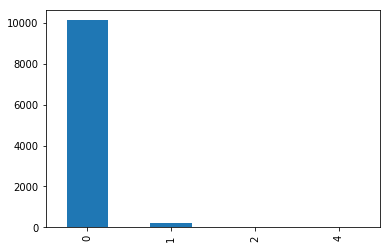

In [29]:
#변수 3 ::Serious injuries
#데이터 분포 확인
d3 = final_data['Serious injuries'].value_counts() #편향
pd.DataFrame(d3)
d3.plot(kind='bar')


##변수의 불균형을 맞춰서 다시 모델에 적용하도록한다. 


In [22]:
#over-sampling  :: 변수 1 
#데이터 불균형을 보완

d2 = final_data['Mild injuries'].value_counts() #편향
pd.DataFrame(d2)

count_class_1, count_class_2, count_class_0, count_class_3, count_class_4, count_class_5, count_class_6, count_class_7, count_class_10, count_class_9, count_class_8 = final_data['Mild injuries'].value_counts()
# 값에 따라 카운트 된 값을 새로운 변수에 저장
#print(count_class_1)
#print(count_class_2)
#print(count_class_0)
#print(count_class_3)
#print(count_class_4)
#print(count_class_5)
#print(count_class_6)
#print(count_class_7)
#print(count_class_10)
#print(count_class_9)
#print(count_class_8)
# Divide by class
#데이터가 잘 들어갔는지 확인해준다.

df_class_1 = final_data[final_data['Mild injuries'] == 1] #값이 1인 행을 변수에 저장
df_class_2 = final_data[final_data['Mild injuries'] == 2]
df_class_0 = final_data[final_data['Mild injuries'] == 0]
df_class_3 = final_data[final_data['Mild injuries'] == 3]
df_class_4 = final_data[final_data['Mild injuries'] == 4]
df_class_5 = final_data[final_data['Mild injuries'] == 5]
df_class_6 = final_data[final_data['Mild injuries'] == 6]
df_class_7 = final_data[final_data['Mild injuries'] == 7]
df_class_10 = final_data[final_data['Mild injuries'] == 10]
df_class_9 = final_data[final_data['Mild injuries'] == 9]
df_class_8 = final_data[final_data['Mild injuries'] == 8]

7253
1579
1082
273
99
31
11
7
2
1
1


Random over-sampling:
10    7253
9     7253
8     7253
7     7253
6     7253
5     7253
4     7253
3     7253
2     7253
1     7253
0     7253
Name: Mild injuries, dtype: int64


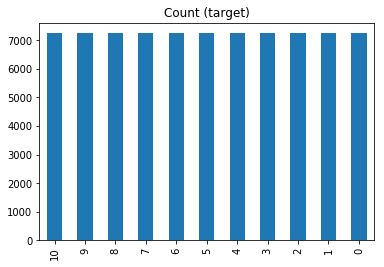

In [116]:
df_class_2_over = df_class_2.sample(count_class_1, replace=True)  #가장 많은 데이터 수에 맞게 데이터를 생성해줌
df_class_0_over = df_class_0.sample(count_class_1, replace=True) 
df_class_3_over = df_class_3.sample(count_class_1, replace=True) 
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_class_5_over = df_class_5.sample(count_class_1, replace=True)
df_class_6_over = df_class_6.sample(count_class_1, replace=True)
df_class_7_over = df_class_7.sample(count_class_1, replace=True)
df_class_10_over = df_class_10.sample(count_class_1, replace=True)
df_class_9_over = df_class_9.sample(count_class_1, replace=True)
df_class_8_over = df_class_8.sample(count_class_1, replace=True)



df_test_over1 = pd.concat([df_class_1, df_class_2_over, df_class_0_over, df_class_3_over, df_class_4_over, df_class_5_over,df_class_6_over,df_class_7_over,df_class_10_over,df_class_9_over,df_class_8_over],axis=0)

print('Random over-sampling:')
print(df_test_over1['Mild injuries'].value_counts())

df_test_over1['Mild injuries'].value_counts().plot(kind='bar', title='Count (target)');

new_Mild_injuries = df_test_over1.loc[:,['Mild injuries']]

In [25]:
#over-sampling  :: 변수 2 
#데이터 불균형을 보완

count2=len(final_data[final_data['Vehicles involved'] == 2])
count1=len(final_data[final_data['Vehicles involved'] == 1])
count3=len(final_data[final_data['Vehicles involved'] == 3])
count4=len(final_data[final_data['Vehicles involved'] == 4])
count5=len(final_data[final_data['Vehicles involved'] == 5])
count6=len(final_data[final_data['Vehicles involved'] == 6])
count7=len(final_data[final_data['Vehicles involved'] == 7])
count9=len(final_data[final_data['Vehicles involved'] == 9])
count0=len(final_data[final_data['Vehicles involved'] == 0])
count8=len(final_data[final_data['Vehicles involved'] == 8])
count10=len(final_data[final_data['Vehicles involved'] == 10])
count14=len(final_data[final_data['Vehicles involved'] == 14])
count13=len(final_data[final_data['Vehicles involved'] == 13])
count11=len(final_data[final_data['Vehicles involved'] == 11])


In [26]:
#데이터 확인
#print(count2)
#print(count1)
#print(count3)
#print(count4)
#print(count5)
#print(count6)
#print(count7)
#print(count9)
#print(count0)
#print(count8)
#print(count10)
#print(count14)
#print(count13)
#print(count11)

7031
2260
798
165
48
14
6
5
5
2
2
1
1
1


In [27]:
df2_class_2 = final_data[final_data['Vehicles involved'] == 2]
df2_class_1 = final_data[final_data['Vehicles involved'] == 1]
df2_class_3 = final_data[final_data['Vehicles involved'] == 3]
df2_class_4 = final_data[final_data['Vehicles involved'] == 4]
df2_class_5 = final_data[final_data['Vehicles involved'] == 5]
df2_class_6 = final_data[final_data['Vehicles involved'] == 6]
df2_class_7 = final_data[final_data['Vehicles involved'] == 7]
df2_class_9 = final_data[final_data['Vehicles involved'] == 9]
df2_class_0 = final_data[final_data['Vehicles involved'] == 0]
df2_class_10 = final_data[final_data['Vehicles involved'] == 10]
df2_class_8 = final_data[final_data['Vehicles involved'] == 8]
df2_class_14 = final_data[final_data['Vehicles involved'] == 14]
df2_class_13 = final_data[final_data['Vehicles involved'] == 13]
df2_class_11 = final_data[final_data['Vehicles involved'] == 11]

Random over-sampling:
10    7031
9     7031
8     7031
7     7031
6     7031
5     7031
4     7031
3     7031
2     7031
1     7031
0     7031
Name: Vehicles involved, dtype: int64


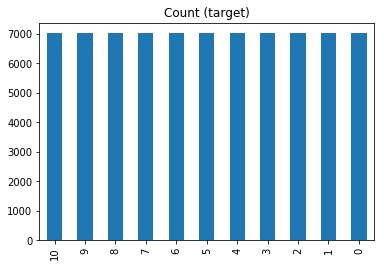

In [28]:
#test
#df2_class_2_over = df2_class_2.sample(count_class_1, replace=True)
df2_class_1_over = df2_class_1.sample(count2, replace=True) 
df2_class_3_over = df2_class_3.sample(count2, replace=True) 
df2_class_4_over = df2_class_4.sample(count2, replace=True)
df2_class_5_over = df2_class_5.sample(count2, replace=True)
df2_class_6_over = df2_class_6.sample(count2, replace=True)
df2_class_7_over = df2_class_7.sample(count2, replace=True)
df2_class_9_over = df2_class_9.sample(count2, replace=True)
df2_class_0_over = df2_class_0.sample(count2, replace=True) 
df2_class_10_over = df2_class_10.sample(count2, replace=True)
df2_class_8_over = df2_class_8.sample(count2, replace=True)



df_test_over2 = pd.concat([df2_class_2, df2_class_1_over, df2_class_3_over, df2_class_4_over, df2_class_5_over,df2_class_6_over,df2_class_7_over,df2_class_9_over,df2_class_0_over,df2_class_10_over,df2_class_8_over],axis=0)

print('Random over-sampling:')
print(df_test_over2['Vehicles involved'].value_counts())

df_test_over2['Vehicles involved'].value_counts().plot(kind='bar', title='Count (target)');

new_Vehicles_involved = df_test_over2.loc[:,['Vehicles involved']]

In [30]:
#over-sampling :: 변수 3
#데이터 불균형을 보완

d3 = final_data['Serious injuries'].value_counts() #편향
pd.DataFrame(d3)

count1_class_0, count1_class_1, count1_class_2, count1_class_4 = final_data['Serious injuries'].value_counts()
# 값에 따라 카운트 된 값을 새로운 변수에 저장
print(count1_class_0)
print(count1_class_1)
print(count1_class_2)
print(count1_class_4)
# Divide by class
df1_class_0 = final_data[final_data['Serious injuries'] == 0]
df1_class_1 = final_data[final_data['Serious injuries'] == 1]
df1_class_2 = final_data[final_data['Serious injuries'] == 2]
df1_class_4 = final_data[final_data['Serious injuries'] == 4]



10116
207
15
1


Random over-sampling:
4    10116
2    10116
1    10116
0    10116
Name: Serious injuries, dtype: int64


40464

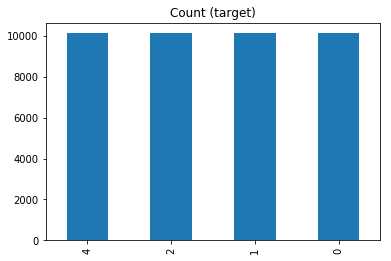

In [47]:
#df1_class_0_over = df1_class_0.sample(count_class_1, replace=True)
df1_class_1_over = df1_class_1.sample(count1_class_0, replace=True) 
#0 : 가장 많은 데이터 수에 맞게 1번 데이터를 샘플링 (1번 데이터가 있는 프레임에서 추출해서 1번의 빈도를 높여줌)
#replace=True 복원추출
df1_class_2_over = df1_class_2.sample(count1_class_0, replace=True) 
df1_class_4_over = df1_class_4.sample(count1_class_0, replace=True) 



df_test_over3 = pd.concat([df1_class_0, df1_class_1_over, df1_class_2_over, df1_class_4_over], axis=0)

print('Random over-sampling:')
print(df_test_over3['Serious injuries'].value_counts())

df_test_over3['Serious injuries'].value_counts().plot(kind='bar', title='Count (target)');

df_test_over3.head()
new_Serious_injuries = df_test_over3.loc[:,['Serious injuries']]
len(new_Serious_injuries)

In [56]:
#균형 맞춘 데이터 합치기

#from pandas import DataFrame as df

#3개를 하나로 합치기 위해 데이터의 개수를 맞춰준다. 
#오버 샘플링된 데이터에서 가장 작은 데이터 개수(40464)만큼 표본을 추출한다.
#표본의 수가 큰 경우 모집단과 유사한 형태를 띄기 때문에 데이터의 균형성 또한 유지된다.

a= pd.DataFrame(new_Mild_injuries.sample(40464))
a_value = a.loc[:,'Mild injuries'].values
a = pd.DataFrame(a_value,columns=['Mild injuries'])
a.head()

b= pd.DataFrame(new_Vehicles_involved.sample(40464))
b_value = b.loc[:,'Vehicles involved'].values
b = pd.DataFrame(b_value,columns=['Vehicles involved'])
b.head()
b.tail()

c= new_Serious_injuries.copy()  # Serious_injuries이 변수는 그대로 사용하기 위해 복사
c_value = c.loc[:,'Serious injuries'].values

a["Vehicles involved"] = b_value
a["Serious_injuries"] = c_value



new_data = a.copy()  #변수에 저장
new_data.head()
#len(new_data)


#imbalance패키지를 안쓰고 해보려고 했지만.. 실패했다.. # 

Mild injuries  Vehicles involved  Serious_injuries
0              3                  5                 0
1              7                  3                 0
2              9                  1                 0
3             10                  2                 0
4              8                  7                 0

In [ ]:
#(0) 문제 (1 점) : 3 ~ 4 줄

#-어떤 모델을 사용했는가? 
 # 회귀 모델을 사용한다.
#-데이터에 대한 설명
 # 바르셀로나시의 지방 경찰이 처리 한 사고 목록. 부상 수, 심각도, 차량 수 및 영향 지점별로 부상 수를 통합한 데이터이다.
 # 원 데이터의 형태는 10339개의 데이터를 가지고 있고, 15개의 컬럼을 가진다. 
 # 각 컬럼의 데이터 타입은 float64(2), int64(6), object(7)이다.
 # null-value는 존재하지 않았다. 


#(1) 특징 (1 점) : 3 ~ 4 라인

#-데이터를 어떻게 전처리 했습니까?  
 # info 함수를 통해 데이터의 타입과 변수와 데이터의 갯수, null값 존재 여부 등 을 한꺼번에 확인한다. 
 # null값은 존재하지 않으므로 결측치 처리는 생략하였고, regression에 적용하기 위해 범주형으로 된 데이터를 수치화하여 사용가능하게 함.
 # id에 대한 컬럼은 단순히 구분을 사건에 대한 구분을 위한 변수이므로 분석에 불필요하다고 판단하여 제거함.
 

#(2) 모델 (2점) : 3 ~ 4 라인

#-왜 모델을 선택 했습니까? 
#-모형리스트 : 선형 회귀, 릿지 회귀, 올가미 회귀, 로지스틱 회귀, 랜덤포레스트
 # 종속변수가 이산형 일때, 로지스틱의 경우 분류를 목적으로 하기 때문에 적합하지 않다고 판단하여 로지스틱 회귀분석은 모델에서 제외시켰다.
 # 나머지 선형,릿지,라쏘,랜덤포레스트 회귀모델들에 대한 MAE값을 비교하였고,
 # 릿지회귀의 MAE값이 약0.0018, 선형회귀의 MAE값이 약0.0025으로 거의 0%에 가까운 값으로 나타났다.
 # 이중에서 MAE값이 최소가되는 릿지 모델을 선택한다. 


#(3) 측정 (2 점) : 3 ~ 4 줄
#-측정 단계 설명
 # 모델에 적용하기전 간단한 전처리 과정을 거치고, 모든 Feature를 모델에 적용하는 것은 바람직하지 않으므로 먼저 Feature를 선택한다.
 # 변수간 상관관계, 주성분(PCA) 분석, Feature의 중요도, 일변량 분석을 통해 최상의 Feature Selection을 함(분석을 한 이유는 코드 위 주석 참고부탁드립니다!)
 # 10-fold 검증을 사용하였고, 회귀모델의 적합도를 측정하는 것이기 때문에 select한 Feature를 이용하여 모델에 적용시키고,
 # 각 모델들의 MAE값을 fold가 증감할때마다 구해준 뒤 10번째 평균값으로 값을 비교하였다. 가장 작은 MAE값을 가지는 모델을 선택한다.  


#(4) 모델 파라미터 엔지니어링 (4 점)
#-성능 향상을 위해 매개 변수를 어떻게 변경 했습니까?
#-이유를 설명하시오
 # 모델마다 꽤 높은 성능을 보였기 때문에 데이터의 분포를 확인하는 과정을 거쳤다. 데이터의 label이 편향되있는 것을 볼 수 있었고,
 # 오버 샘플링(over sampling)을 시도- 오버샘플링은 이용한 이유는 데이터 불균형을 보완하기 위해는 여러가지 샘플링 방법들이 존재하지만
 # 언더 샘플링의 경우 데이터의 손실이 크다고 생각하여 오버 샘플링을 선택하여 데이터를 균형있게 생성하였다.
 # 오버 샘플링의 경우 과적합이 발생할 수 있고, 하나의 데이터 프레임으로 만들고자 3개의 변수 중 데이터의 크기가 가장 작은 값만큼 다른 변수를 샘플링 하였다. 
 # 표본의 크기가 클수록 모집단과 유사하므로 균형있는 데이터의 분포를 유지하며 데이터 샘플링을 할 수 있었다.
 # 이 부분은.. imbalance패키지를 사용하지않고 해보려 이것저것 시도 했으나.. 결국 성공하진 못했다..
